In [212]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline


In [213]:
imagem = cv2.imread('Imagens/IMG_20230504_090851.bmp',0)
#plt.imshow(imagem)


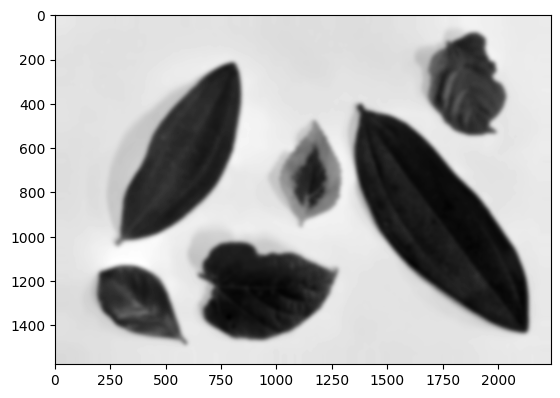

In [214]:
#Colocando bordas na imagem
imagem = cv2.copyMakeBorder(imagem, 50, 50, 50, 50, cv2.BORDER_REPLICATE)
imagem_original = imagem

#Borra bastante
imagem = cv2.GaussianBlur(imagem,(55,55),0)
plt.imshow(imagem, cmap='gray')

Limiar binary invertido + limiar de OTSU
o método de Otsu determina um valor de limite global ideal a partir do histograma da imagem

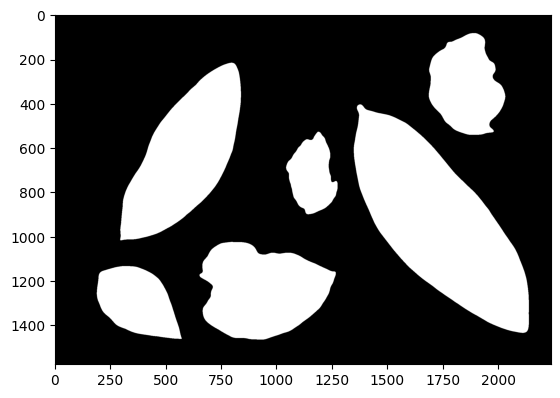

In [215]:
limiar, imagem_limiar = cv2.threshold(imagem,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU )

imagem_limiar_255 = imagem_limiar*255
imagem_limiar_255 = imagem_limiar_255.astype(np.uint8)
plt.imshow(imagem_limiar_255, cmap='gray')

In [216]:

# Encontrando os contornos na imagem
contornos, void = cv2.findContours(imagem_limiar_255, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Desenhar os contornos na imagem original
#imagem_contornos = cv2.drawContours(cv2.cvtColor(imagem_original, cv2.COLOR_BAYER_BG2BGRA), contornos, -1, (255,0,0), -5)

#lt.imshow(imagem_contornos)

Aqui temos o numero de objetos na imagem, que vai ser igual ao numero de bordas encontradas
    - vai dar ruim quando um objeto esta em cima de outro, ai não tem o que fazer

In [217]:
size = len(contornos)
size

6

Area:  86822.0
Perimetro:  1210.6315920352936
Solidez:  0.99359704285232
Diametro:  332.4833886873092 

Area:  192216.0
Perimetro:  1847.9250919818878
Solidez:  0.9510182271566823
Diametro:  494.7090178385816 

Area:  55337.5
Perimetro:  1023.7026586532593
Solidez:  0.9379475749383459
Diametro:  265.43905761357365 

Area:  407557.0
Perimetro:  2938.168946504593
Solidez:  0.989728900777466
Diametro:  720.3594166342443 

Area:  238264.0
Perimetro:  2207.3119583129883
Solidez:  0.9897993307563367
Diametro:  550.7877512134587 

Area:  112157.0
Perimetro:  1395.9351950883865
Solidez:  0.9481247913029879
Diametro:  377.89248155905625 



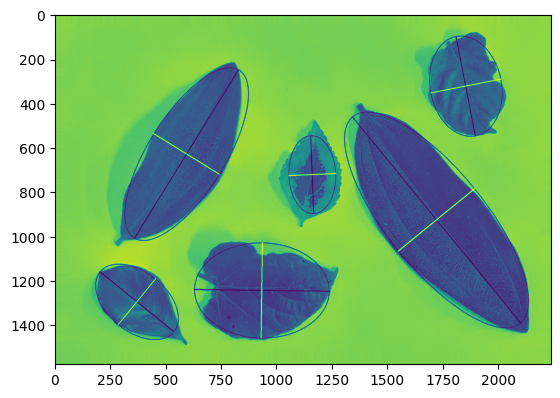

In [218]:


for cnt in contornos:

    """ (x,y),(MA,ma),angle = cv2.fitEllipse(cont)
    print("Eixo maior: ", MA)
    print("Eixo menor: ", ma) """


    #area
    area = cv2.contourArea(cnt)
    print("Area: ", area)
    
    #perimetro
    perimetro = cv2.arcLength(cnt,True)
    print("Perimetro: ", perimetro)

    #solidez
    hull = cv2.convexHull(cnt)
    hull_area = cv2.contourArea(hull)
    solidity = float(area)/hull_area
    print("Solidez: ", solidity)

    #diametro
    equi_diameter = np.sqrt(4*area/np.pi)
    print("Diametro: ", equi_diameter, "\n")

    """ rect = cv2.minAreaRect(cnt)
    caixa = cv2.boxPoints(rect)
    caixa = np.int0(caixa)
    imagem_caixa = cv2.drawContours(imagem_original,[caixa],0,(0,0,255),2) """

    (xc,yc),(d1,d2),angle  = cv2.fitEllipse(cnt)
    imagem_caixa =cv2.ellipse(imagem_original,((xc,yc),(d1,d2),angle),(0,255,0),2)


    # draw major axis line in red
    rmajor = max(d1,d2)/2
    if angle > 90:
        angle = angle - 90
    else:
        angle = angle + 90
    #print(angle)

    x1 = xc + math.cos(math.radians(angle))*rmajor
    y1 = yc + math.sin(math.radians(angle))*rmajor
    x2 = xc + math.cos(math.radians(angle+180))*rmajor
    y2 = yc + math.sin(math.radians(angle+180))*rmajor
    cv2.line(imagem_caixa, (int(x1),int(y1)), (int(x2),int(y2)), (0, 0, 255), 3)

    # draw minor axis line in blue
    rminor = min(d1,d2)/2
    if angle > 90:
        angle = angle - 90
    else:
        angle = angle + 90
    #print(angle)
    x1 = xc + math.cos(math.radians(angle))*rminor
    y1 = yc + math.sin(math.radians(angle))*rminor
    x2 = xc + math.cos(math.radians(angle+180))*rminor
    y2 = yc + math.sin(math.radians(angle+180))*rminor
    cv2.line(imagem_caixa, (int(x1),int(y1)), (int(x2),int(y2)), (255, 0, 0), 3)
    plt.imshow(imagem_caixa)

    



